# Fraction of connections unidentified
- Queries our lamina connectome for a list of all connections (also called 'links' in catmaid) to the number of those with unidentified postsynaptic partners. 
- The list of unknowns is broken down by ommatidia and displayed in a retinotopic heatmap. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vis.hex_lattice import hexplot
from vis.fig_tools import hex_to_rgb, linear_cmap

In [3]:
tp = '200914'
data_path = f"~/Data/{tp}_lamina/{tp}"
#cx = pd.read_pickle(data_path + "_cxdf.pickle")
links = pd.read_pickle(data_path + "_linkdf.pickle")
display(len(links))
display(len(links.cx_id.unique()))

20716

3072

## Number of synaptic inputs received by each subtype

In [5]:
input_counts = links.groupby('post_type')['link_id'].nunique()  
display(counts)

post_type
LMC_1      3969
LMC_2      4972
LMC_3      3195
LMC_4      1838
LMC_N       132
R1R4        100
R2R5       1072
R3R6         95
R7          302
R7p        1356
R8          590
UNKNOWN    1236
centri     1859
Name: link_id, dtype: int64

In [26]:
p_unknown = dict()
n_unknown = dict()
n_syn = dict()
n_term = dict()

for om, l in links.groupby('pre_om'):
    unknown_count = (l['post_type'] == 'UNKNOWN').sum()
    percent = float(unknown_count)/float(len(l['link_id']))

    # make sure each link ID is unique (preprocessing should get rid of pre/post duplicates)
    assert(len(l['link_id'].unique()) == len(l['link_id']))
    n_term[om] = l['cx_id'].nunique()
    n_syn[om] = l['link_id'].nunique()
    p_unknown[om] = percent
    n_unknown[om] = unknown_count


103

In [27]:
om_summary = pd.DataFrame(data={'n_syn': n_syn, 
                                'n_unknown':n_unknown, 
                                'n_term': n_term})
om_summary['n_known'] = om_summary['n_syn'] - om_summary['n_unknown']
om_summary

,n_syn,n_unknown,n_term,n_known
A0,734,69,107,665
A1,724,24,109,700
A2,517,33,89,484
A3,778,5,111,773
A4,720,32,111,688
A5,627,25,95,602
B0,746,51,111,695
B1,858,120,118,738
B2,728,66,101,662
B3,628,18,98,610


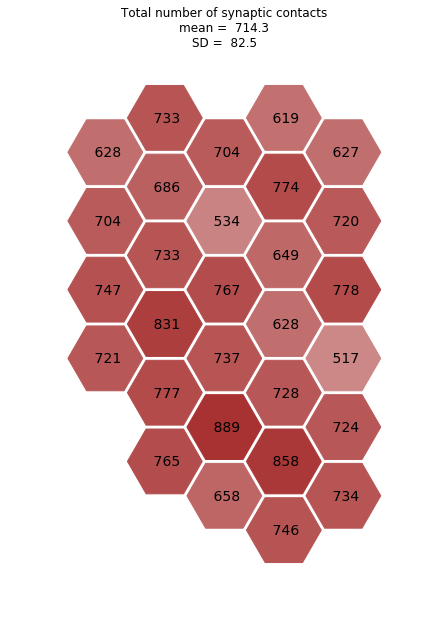

In [33]:
fig, ax = plt.subplots(1, figsize=[8, 10])
cm = linear_cmap(n_vals=100, max_colour='#a83232', min_colour='#ffffff')
high = om_summary['n_syn'].max()

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .0f}'} for om, v in om_summary['n_syn'].items()}
ax.set_title(f"Total number of synaptic contacts\n" + 
            f"mean = {om_summary['n_syn'].mean(): .1f}\n" + 
            f"SD = {om_summary['n_syn'].std(ddof=0): .1f}")

hexplot(hex_data, ax=ax)
plt.show()

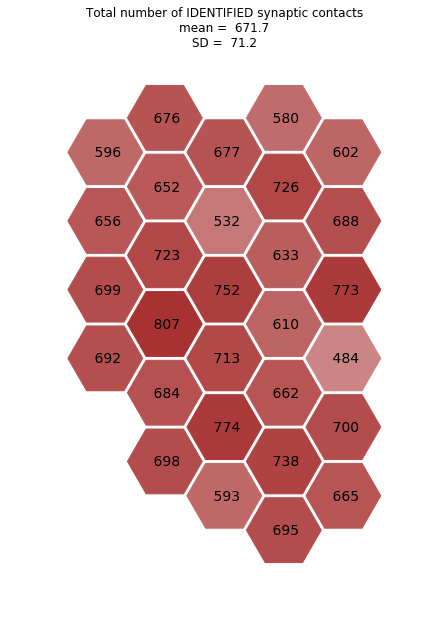

In [34]:
fig, ax = plt.subplots(1, figsize=[8, 10])
cm = linear_cmap(n_vals=100, max_colour='#a83232', min_colour='#ffffff')
high = om_summary['n_known'].max()

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .0f}'} for om, v in om_summary['n_known'].items()}
ax.set_title(f"Total number of IDENTIFIED synaptic contacts\n" + 
            f"mean = {om_summary['n_known'].mean(): .1f}\n" + 
            f"SD = {om_summary['n_known'].std(ddof=0): .1f}")

hexplot(hex_data, ax=ax)
plt.show()

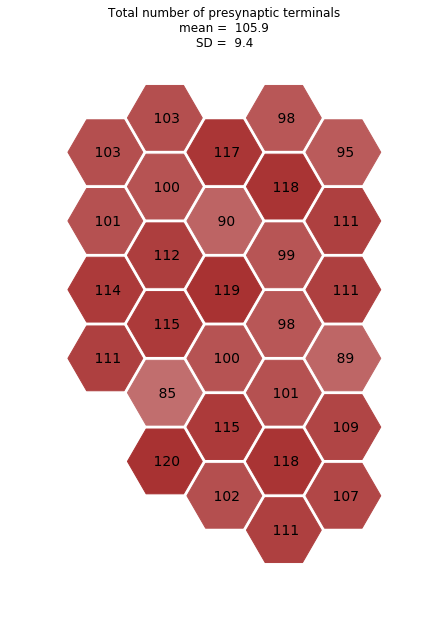

In [35]:
fig, ax = plt.subplots(1, figsize=[8, 10])
cm = linear_cmap(n_vals=100, max_colour='#a83232', min_colour='#ffffff')
high = om_summary['n_term'].max()

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .0f}'} for om, v in om_summary['n_term'].items()}
ax.set_title(f"Total number of presynaptic terminals\n" + 
            f"mean = {om_summary['n_term'].mean(): .1f}\n" + 
            f"SD = {om_summary['n_term'].std(ddof=0): .1f}")

hexplot(hex_data, ax=ax)
plt.show()

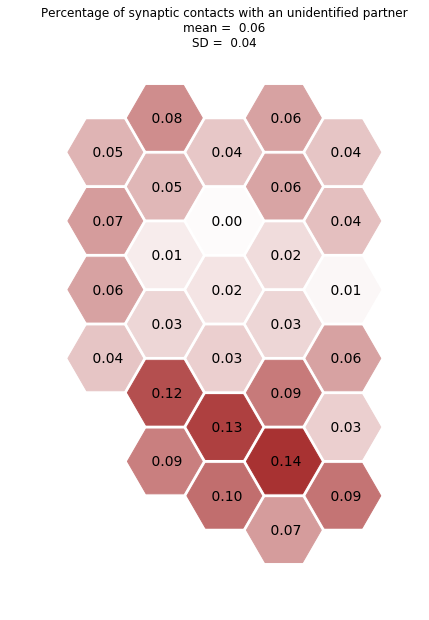

In [45]:
fig, ax = plt.subplots(1, figsize=[8, 10])
high = max(list(p_unknown.values()))

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .2f}'} for om, v in p_unknown.items()}

ax.set_title(f"Percentage of synaptic contacts with an unidentified partner\n" + 
            f"mean = {np.mean(list(p_unknown.values())): .2f}\n" + 
            f"SD = {np.std(list(p_unknown.values())): .2f}")
hexplot(hex_data, ax=ax)
plt.show()
